In [10]:
%load_ext autoreload
%autoreload 2

# import logging
from roku import Roku
import cv2
import numpy as np
import warnings
import logging
import sys
import os

from litter_monitor.util import roku as r
from litter_monitor.util import plex as p
from litter_monitor.util import mqtt as m
from litter_monitor.util import storage as s
from litter_monitor.util import fileop as f
from litter_monitor.util import opencv as o
from litter_monitor.util import image as i


logging.disable(sys.maxsize)

#load environment variables
from dotenv import load_dotenv
load_dotenv()

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


True

## Detected file

TypeError: Image data of dtype <U37 cannot be converted to float

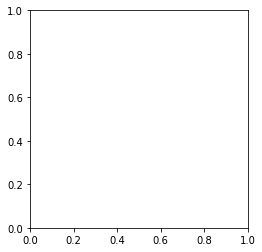

In [11]:
detected_image = "/litter-monitor/detected/detected.jpg"
i.mdisp(detected_image, 'Detected image')

## snapshot file

Populating the interactive namespace from numpy and matplotlib


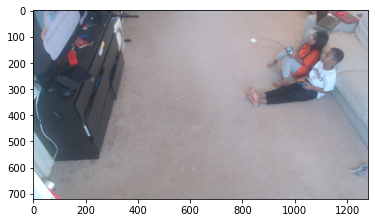

In [17]:
%pylab inline
import matplotlib.pyplot as plt
import matplotlib.image as mpimg
img = mpimg.imread('/storage/images/camtest.jpg')
imgplot = plt.imshow(img)
plt.show()

TypeError: Image data of dtype object cannot be converted to float

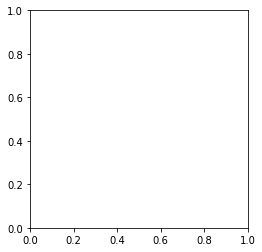

In [4]:
#Input
storage_location = '/storage'
snapshot_remote_filename = 'camtest.jpg'
snapshot_url = 'http://camerapi/' + snapshot_remote_filename
roku_ip = '192.168.1.115'
plex_user = os.environ['PLEX_USER']
plex_passwd = os.environ['PLEX_PASSWD']
plex_client_name = '55" TCL Roku TV'
plex_server_name = "swarm-plexserver"
plex_library_name = "trash"
mqtt_broker = "192.168.1.136"


#automatic
images_url = "https://raw.githubusercontent.com/ravi9884/machine-learning-portfolio/master/litter-monitor/app/resources/images/"
ref_file_list = [images_url+'base_19_54.jpg',
    images_url+'base_09_39.jpg',
    images_url+'base_15_57.jpg',
    images_url + 'mask.jpg']

images_dir = storage_location +'/images'
reference_dir = storage_location + '/references'
data_dir = storage_location + '/data'
detected_dir = storage_location + '/detected'
objects_found_dir = storage_location + '/objects_found'
special_dirs = [images_dir, reference_dir, data_dir, objects_found_dir, detected_dir]


chosen_ref_filename = f.get_closest_file(reference_dir)
mask_filename = reference_dir + '/mask.jpg'
data_filename = data_dir + '/found_objects.pkl'
detected_filename = detected_dir+'/detected.jpg'
snapshot_filename = images_dir + '/' + snapshot_remote_filename

mask_image, ref_image, snapshot_image = o.get_base_images(mask_filename, chosen_ref_filename, snapshot_filename)

i.mdisp(mask_image, 'Mask for the room')
i.mdisp(ref_image, 'Image when the room was clean')
i.mdisp(snapshot_image, 'Current image of the room')